<a href="https://colab.research.google.com/github/Rishant-gupta/Music_recommendation_system/blob/task_begin/populrty_pred_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_csv("/content/processed_data.txt", index_col=0)

In [3]:
#rows
df_clean.shape[0]

81343

In [4]:
df_clean.head()

,track_id,artists,album_name,track_name,popularity,track_genre,duration_min,PCA1,PCA2,PCA3,PCA4,PCA5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,Folk,3.84,-1.100515,-0.431883,-0.094871,0.094938,0.005738
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,Folk,2.49,-1.565618,0.467778,-0.402545,-0.207976,-0.144959
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,Folk,3.51,-1.524470,-0.076150,0.056276,-0.373241,-0.283572
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,Folk,3.37,1.855022,0.992264,-0.475583,-0.370995,-0.165991
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,Folk,3.31,-0.104338,0.185106,-0.144287,-0.242401,-0.246385


In [5]:
y_clean = (df_clean['popularity'] > 0.35).astype(int)

In [6]:
X_clean = df_clean[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']].copy()

In [7]:
X_clean.shape

(81343, 5)

In [8]:
y_clean.shape

(81343,)

In [9]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4]
}

In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [12]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=5,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [13]:
random_search.fit(X_clean, y_clean)
#Random Search Complete
print(f"Best Accuracy:- {random_search.best_score_:.2%}")
print("Best Parameters:-")
print(random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Accuracy:- 61.88%
Best Parameters:-
{'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
new_best_params = random_search.best_params_
print(f"Using best para to build final model: {new_best_params}")

Using best para to build final model: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [27]:
#final model with these parameters
final_popularity_model = RandomForestClassifier(random_state=42,**new_best_params)

In [28]:
#Training final model on all clean data
final_popularity_model.fit(X_clean, y_clean)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [35]:
importances = final_popularity_model.feature_importances_
featurename = X_clean.columns

In [36]:
importance_df = pd.DataFrame({'Feature': featurename,'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head(5))

  Feature  Importance
2    PCA3    0.272623
4    PCA5    0.218949
3    PCA4    0.177040
0    PCA1    0.168807
1    PCA2    0.162582


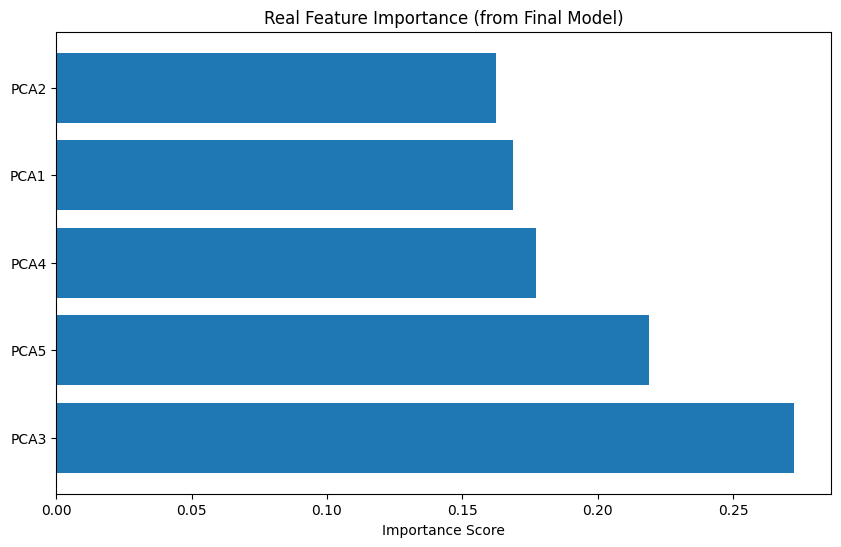

In [37]:
# 3. Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Real Feature Importance (from Final Model)")
plt.show()